## Final Project Submission
* Student name: Stephen Cibik
* Student pace: self paced
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


## First a look at the data:

In [75]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
plt.style.use('dark_background')

df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### We can see that there are quite a number of missing values in 'waterfront' and 'yr_renovated' by using .info()
 - There are also just a few missing from 'view'

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


## A running guide of column descriptions:
 - id: identification number for a house
 - date: date the house was sold
 - price: the prediction target, how much the house sold for
 - bedrooms: # of bedrooms in the house
 - bathrooms: # of bathrooms in the house
 - sqft_living: square footage of the home
 - sqft_lot: square footage of the lot
 - floors: total number of levels in the house
 - waterfront: house which has a view to a waterfront
 - view: # of times house has been viewed
 - condition: how good the overall condition is on a scale between 1-5
 - grade: overall grade given to house by King County grading system (1-13)
 - sqft_above: square footage of house apart from basement
 - sqft_basement: square footage of the basement
 - yr_built: year house was built
 - yr_renovated: year when house was renovated (will be 0 if N/A)
 - zipcode: the zipcode for the house
 - lat: latitude coordinate
 - long: longitude coordinate
 - sqft_living15: living room area in 2015 (implies renovation, may affect lot size)
 - sqft_lot15: lot area in 2015 (renovation sensitive)

In [3]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


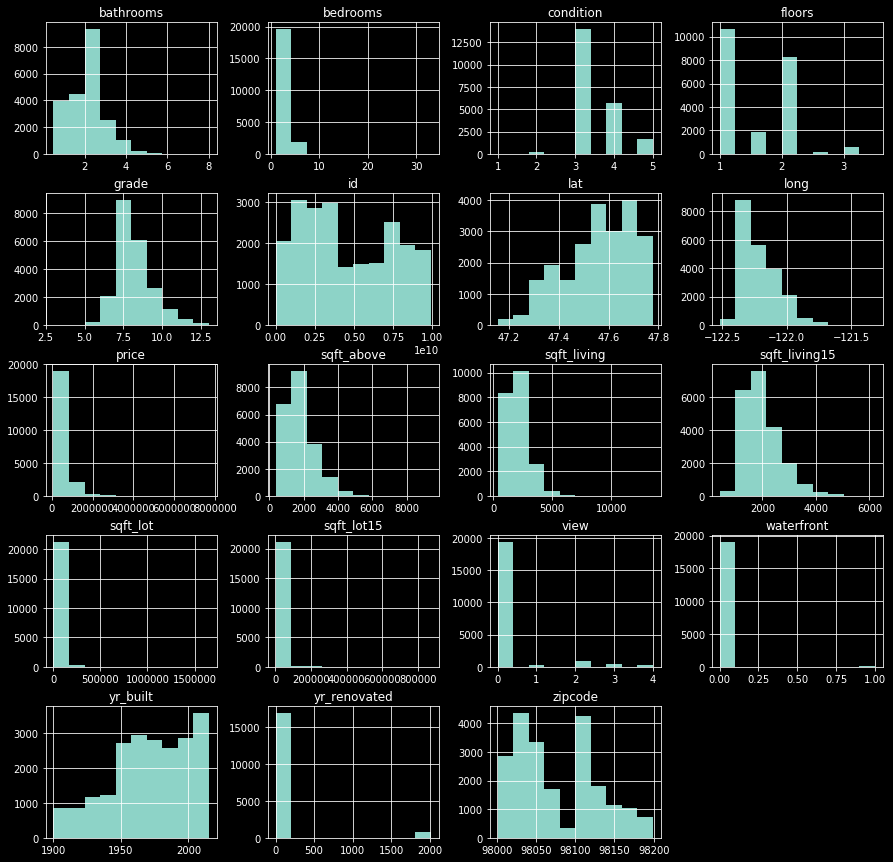

In [151]:
df.hist(figsize=(15,15));

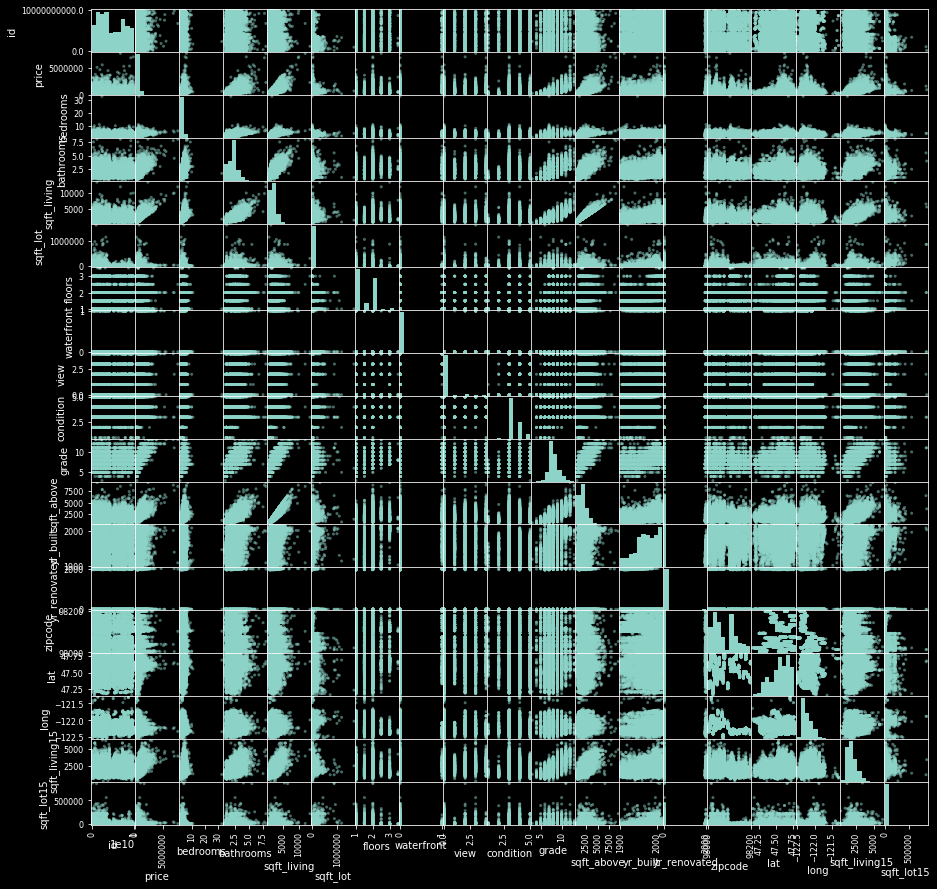

In [276]:
pd.plotting.scatter_matrix(df, figsize=(15,15));

## Notes from Scatter Matrix:
### On correlations:
 - Clear positive correlation btw sqft_above, bathrooms, grade, and sqft_living
 - The same thing can be seen with price: bathrooms and sqft_living seem more important than the number of bedrooms
 - Price appears to be correlated with sqft_living, sqft_living15, sqft_above, grade, bathrooms, and even a bit with lat

### On distributions:
 - Few of the features are normally distributed from the start, some transformation may be helpful.
 - Right away I can see that the grade is close to normally distributed already. This may be a result of how the scoring was done by King County.
 - Distributions which have positive skew and look like they may benefit from log transformation include:
     - bathrooms
     - floors
     - sqft_living
     - sqft_above
     - zipcode?
     - long
     - sqft_living15
 - lat also has a normalish distribution with negative skew

## We can use Pandas to look at Pearson correlation coefficients between our raw features, and Seaborn to produce a heatmap:

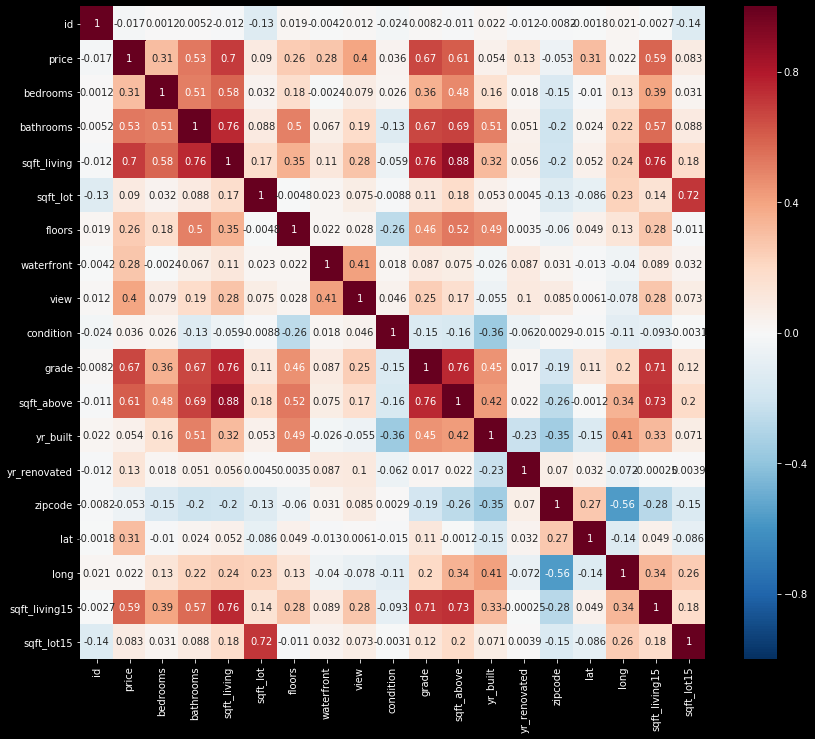

In [152]:
import seaborn as sns

correlation = df.corr()
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

### Despite the fact that we can already see strong colinearity between some variables, I am going to leave them all in for now, then later drop based on p-values.

# Fixing sqft_basement:
 - The column has so far been invisible as it was not a numeric datatype, caused by '?' notation for its NaN values. These missing values can be calculated by subtracting the sqft_above column from the sqft_living column, and may still prove to be a valuable predictor.

In [76]:
df[['sqft_living','sqft_above','sqft_basement']].head()

,sqft_living,sqft_above,sqft_basement
0,1180,1180,0.0
1,2570,2170,400.0
2,770,770,0.0
3,1960,1050,910.0
4,1680,1680,0.0


In [77]:
df[df['sqft_basement']=='?'][['sqft_living','sqft_above','sqft_basement']].head()

,sqft_living,sqft_above,sqft_basement
6,1715,1715,?
18,1200,1200,?
42,3595,3595,?
79,3450,3450,?
112,1540,1160,?


In [78]:
#Check number of ?'s
df.sqft_basement.value_counts().head()

0.0      12826
?          454
600.0      217
500.0      209
700.0      208
Name: sqft_basement, dtype: int64

In [79]:
#create new column by subtracting
df['sqft_basement2'] = df.sqft_living - df.sqft_above
df.sqft_basement2.head()

0      0
1    400
2      0
3    910
4      0
Name: sqft_basement2, dtype: int64

In [80]:
#replace ?'s with numbers so the column can be converted to numeric for comparison
df.loc[df['sqft_basement']=='?',['sqft_basement']] = '99999'
df[df['sqft_basement']=='99999'].head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement2
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,1715,99999,1995,0.0,98003,47.3097,-122.327,2238,6819,0
18,16000397,12/5/2014,189000.0,2,1.00,1200,9850,1.0,0.0,0.0,...,1200,99999,1921,0.0,98002,47.3089,-122.210,1060,5095,0
42,7203220400,7/7/2014,861990.0,5,2.75,3595,5639,2.0,0.0,0.0,...,3595,99999,2014,0.0,98053,47.6848,-122.016,3625,5639,0
79,1531000030,3/23/2015,720000.0,4,2.50,3450,39683,2.0,0.0,0.0,...,3450,99999,2002,0.0,98010,47.3420,-122.025,3350,39750,0
112,2525310310,9/16/2014,272500.0,3,1.75,1540,12600,1.0,0.0,0.0,...,1160,99999,1980,0.0,98038,47.3624,-122.031,1540,11656,380


In [81]:
df.sqft_basement.head()

0      0.0
1    400.0
2      0.0
3    910.0
4      0.0
Name: sqft_basement, dtype: object

In [82]:
df.sqft_basement = df.sqft_basement.astype('float64')
df.sqft_basement.head()

0      0.0
1    400.0
2      0.0
3    910.0
4      0.0
Name: sqft_basement, dtype: float64

In [83]:
df.sqft_basement2 = df.sqft_basement2.astype('float64')
df.sqft_basement2.head()

0      0.0
1    400.0
2      0.0
3    910.0
4      0.0
Name: sqft_basement2, dtype: float64

### I will check to see if there are any discrepencies in calculated sqft_basement values with the given ones, if there are none I will drop the old column for the new one

In [84]:
df['error_check'] = np.where(df['sqft_basement']==df['sqft_basement2'], True, False)
df.error_check.head()

0    True
1    True
2    True
3    True
4    True
Name: error_check, dtype: bool

In [85]:
len(df) - df.error_check.sum()

454

### There should be the same number of errors as there were '?'s in the original dataset.

In [86]:
len(df[df['sqft_basement']==99999])

454

## We see that there are the same number of discrepancies with the new basement sqare footage values as there were missing values in the original dataset.
 - this means that there were no discrepancies with known values. This means the old column can be replaced entirely with the newly calculated column.

In [87]:
df.drop(columns=['sqft_basement'], inplace=True)

## Now we need to deal with the date. My first inclination was to drop it, but I think I will convert it into a useable format and see how it behaves as a predictor just for good measure.

In [88]:
df.date.head()

0    10/13/2014
1     12/9/2014
2     2/25/2015
3     12/9/2014
4     2/18/2015
Name: date, dtype: object

In [89]:
import datetime as dt

df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)
df['date'] = df.date.map(dt.datetime.toordinal)
df.date.head()

0    735519
1    735576
2    735654
3    735576
4    735647
Name: date, dtype: int64

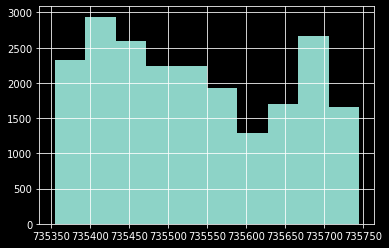

In [90]:
df.date.hist()

In [91]:
df.date.skew()

0.17922219633061523

### The date has now been turned to numbers which have a non-skewed distribution.

In [92]:
df.drop(columns=['error_check'],inplace=True)

# Now to deal with the 'yr_renovated' feature

In [93]:
df.yr_renovated.isnull().sum()

3842

## That's a lot of missing values
- I am going to start by making the assumption that houses with no data for renovation are probably not renovated, and replace all of these values with zeroes.

In [94]:
df.yr_renovated.fillna(value=0,inplace=True)

In [95]:
df.yr_renovated.isnull().sum()

0

## Now to fix Waterfront:
 - I think the best way to deal with the large number of missing values will be to treat the missing values as a new category, and then dropping that dummy variable from the dataframe, leaving two dummies which indicate whether the house definitely is or definitely isn't on the water.

In [96]:
#This cell is for just filling the missing values with zero, which turns out to be equally effective
df.waterfront.fillna(value=0,inplace=True)

In [29]:
df.waterfront.isna().sum()

2376

In [30]:
df.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [31]:
df.waterfront.fillna(value=99999, inplace=True)

In [32]:
df['waterfront_cats'] = df.waterfront.astype('category')

In [33]:
df.waterfront_cats.head()

0    99999.0
1        0.0
2        0.0
3        0.0
4        0.0
Name: waterfront_cats, dtype: category
Categories (3, float64): [0.0, 1.0, 99999.0]

In [34]:
waterfront_dummies = pd.get_dummies(df.waterfront_cats, prefix = 'waterfront')
waterfront_dummies.head()

,waterfront_0.0,waterfront_1.0,waterfront_99999.0
0,0,0,1
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [35]:
waterfront_dummies.drop(columns=['waterfront_99999.0'], inplace=True)
waterfront_dummies.rename(columns={'waterfront_0.0':'waterfront_0',
                                   'waterfront_1.0':'waterfront_1'}, inplace=True)

In [36]:
waterfront_dummies.head()

,waterfront_0,waterfront_1
0,0,0
1,1,0
2,1,0
3,1,0
4,1,0


In [37]:
df.drop(columns=['waterfront','waterfront_cats'],inplace=True)
df = pd.concat([df,waterfront_dummies],axis=1)

In [38]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement2,waterfront_0,waterfront_1
0,7129300520,735519,221900.0,3,1.00,1180,5650,1.0,0.0,3,...,1955,0.0,98178,47.5112,-122.257,1340,5650,0.0,0,0
1,6414100192,735576,538000.0,3,2.25,2570,7242,2.0,0.0,3,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,400.0,1,0
2,5631500400,735654,180000.0,2,1.00,770,10000,1.0,0.0,3,...,1933,0.0,98028,47.7379,-122.233,2720,8062,0.0,1,0
3,2487200875,735576,604000.0,4,3.00,1960,5000,1.0,0.0,5,...,1965,0.0,98136,47.5208,-122.393,1360,5000,910.0,1,0
4,1954400510,735647,510000.0,3,2.00,1680,8080,1.0,0.0,3,...,1987,0.0,98074,47.6168,-122.045,1800,7503,0.0,1,0


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id                21597 non-null int64
date              21597 non-null int64
price             21597 non-null float64
bedrooms          21597 non-null int64
bathrooms         21597 non-null float64
sqft_living       21597 non-null int64
sqft_lot          21597 non-null int64
floors            21597 non-null float64
waterfront        21597 non-null float64
view              21534 non-null float64
condition         21597 non-null int64
grade             21597 non-null int64
sqft_above        21597 non-null int64
yr_built          21597 non-null int64
yr_renovated      21597 non-null float64
zipcode           21597 non-null int64
lat               21597 non-null float64
long              21597 non-null float64
sqft_living15     21597 non-null int64
sqft_lot15        21597 non-null int64
sqft_basement2    21597 non-null float64
dtypes: float64(9), int64(12)
memory usage: 3.5 MB


### Just a few values to fix in 'view'. I think replacing them with the mode (zero) will be fine since the vast majority of entries are zero, and the reason the data is missing may be because the house was not viewed, which would be a zero.

In [98]:
df.view.fillna(value=0,inplace=True)

In [99]:
df.isnull().any()

id                False
date              False
price             False
bedrooms          False
bathrooms         False
sqft_living       False
sqft_lot          False
floors            False
waterfront        False
view              False
condition         False
grade             False
sqft_above        False
yr_built          False
yr_renovated      False
zipcode           False
lat               False
long              False
sqft_living15     False
sqft_lot15        False
sqft_basement2    False
dtype: bool

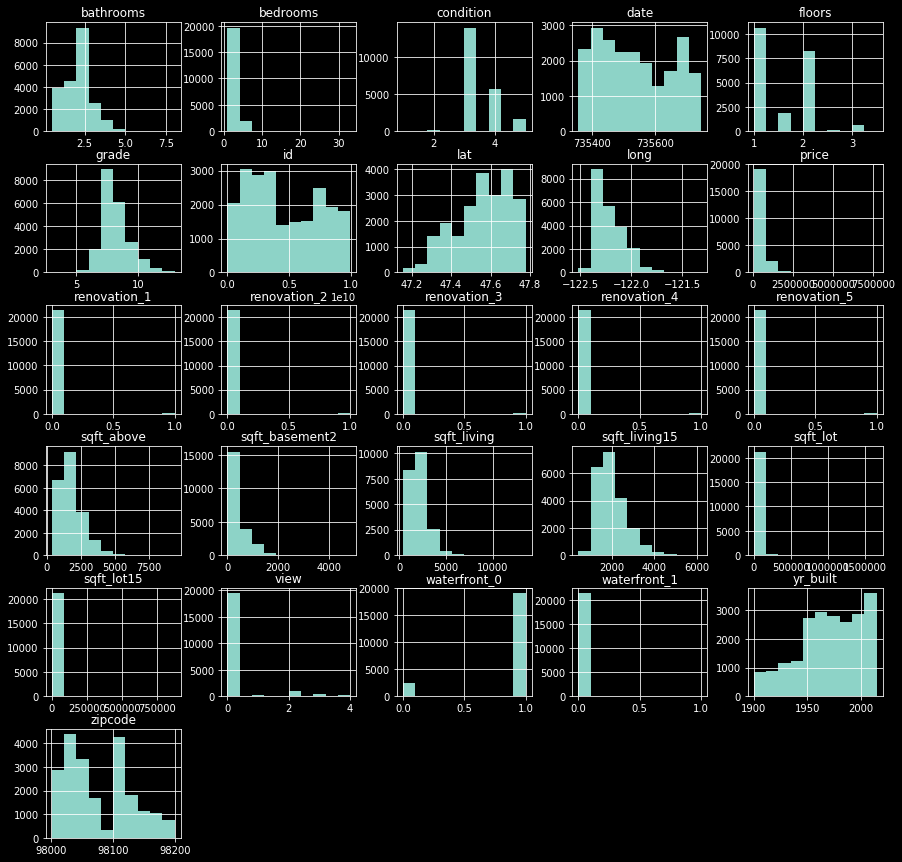

In [192]:
df.hist(figsize=(15,15));

## A look at some skewness measurements:
 - using guideline of <-0.5 is considered negative skew, >0.5 is positive skew

In [42]:
df.skew(axis=0, skipna = True)

id                 0.243226
date               0.179222
price              4.023365
bedrooms           2.023641
bathrooms          0.519709
sqft_living        1.473215
sqft_lot          13.072604
floors             0.614497
view               3.405698
condition          1.036037
grade              0.788237
sqft_above         1.447434
yr_built          -0.469450
zipcode            0.405322
lat               -0.485522
long               0.884888
sqft_living15      1.106875
sqft_lot15         9.524362
sqft_basement2     1.576890
renovation_1      11.380796
renovation_2      11.956272
renovation_3      12.039585
renovation_4      12.436648
renovation_5      11.874619
waterfront_0      -2.386723
waterfront_1      12.039585
dtype: float64

### These readings confirm that bathrooms, floors, sqft_living, sqft_above, long, and sqft_living15 could potentially benefit from a log transformation.

## Just a quick and dirty regression to see where we're at:

In [103]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, target, random_state=3)
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [104]:
linreg.score(X_test, y_test)

0.6943471357553285

# Now we are ready for recursive feature selection:

### Starting with Forward Backward selection:

In [105]:
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [106]:
included = stepwise_selection(df, target)
selected = df[included]
selected.head()

Add  waterfront                     with p-value 0.0
Add  sqft_living15                  with p-value 0.0
Add  bathrooms                      with p-value 0.0
Add  grade                          with p-value 0.0
Add  yr_built                       with p-value 0.0
Add  sqft_living                    with p-value 0.0
Add  lat                            with p-value 0.0
Add  view                           with p-value 3.39188e-137
Add  bedrooms                       with p-value 1.20391e-66
Add  zipcode                        with p-value 2.6588e-36
Add  long                           with p-value 6.12372e-61
Add  condition                      with p-value 1.03147e-20
Add  date                           with p-value 3.29483e-21
Add  sqft_above                     with p-value 2.69431e-19
Add  sqft_basement2                 with p-value 4.04613e-52
Add  yr_renovated                   with p-value 4.86807e-10
Add  sqft_lot15                     with p-value 6.173e-07
Add  id              

,waterfront,sqft_living15,bathrooms,grade,yr_built,sqft_living,lat,view,bedrooms,zipcode,long,condition,date,sqft_above,sqft_basement2,yr_renovated,sqft_lot15,id
0,0.0,1340,1.00,7,1955,1180,47.5112,0.0,3,98178,-122.257,3,735519,1180,0.0,0.0,5650,7129300520
1,0.0,1690,2.25,7,1951,2570,47.7210,0.0,3,98125,-122.319,3,735576,2170,400.0,1991.0,7639,6414100192
2,0.0,2720,1.00,6,1933,770,47.7379,0.0,2,98028,-122.233,3,735654,770,0.0,0.0,8062,5631500400
3,0.0,1360,3.00,7,1965,1960,47.5208,0.0,4,98136,-122.393,5,735576,1050,910.0,0.0,5000,2487200875
4,0.0,1800,2.00,8,1987,1680,47.6168,0.0,3,98074,-122.045,3,735647,1680,0.0,0.0,7503,1954400510


In [107]:
from statsmodels.formula.api import ols

outcome = 'price'
pred_sum = '+'.join(selected.columns)
formula = outcome + '~' + pred_sum

model = ols(formula=formula, data=pd.concat([selected, target], axis=1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     2980.
Date:                Fri, 25 Oct 2019   Prob (F-statistic):               0.00
Time:                        19:32:00   Log-Likelihood:            -2.9434e+05
No. Observations:               21597   AIC:                         5.887e+05
Df Residuals:                   21579   BIC:                         5.889e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -8.046e+07    9.4e+06     -8.562      0.000   -9.89e+07    -6.2e+07
waterfront      6.172e+05   1.81e+04     34.104      0.000    5.82e+05    6.53e+05
sqft_living15     20.5118      3.415      6.007      0.000      13.819      27.205
bathrooms       4.364e+04   3140.061     13.899      0.000    3.75e+04    4.98e+04
grade           9.785e+04   2147.953     45.556      0.000    9.36e+04    1.02e+05
yr_built       -2613.9101     70.048    -37.316      0.000   -2751.210   -2476.610
sqft_living      109.7737      2.256     48.669      0.000     105.353     114.195
lat             6.039e+05   1.07e+04     56.554      0.000    5.83e+05    6.25e+05
view            5.348e+04   2117.023     25.260      0.000    4.93e+04    5.76e+04
bedrooms       -3.624e+04   1895.747    -19.117      0.000      -4e+04   -3.25e+04
zipcode         -576.5995     32.783    -17.588      0.000    -640.857    -512.342
long           -2.147e+05   1.31e+04    -16.433      0.000    -2.4e+05   -1.89e+05
condition       2.759e+04   2341.614     11.781      0.000     2.3e+04    3.22e+04
date             117.6211     12.132      9.695      0.000      93.841     141.401
sqft_above        72.4774      2.087     34.724      0.000      68.386      76.569
sqft_basement2    37.2763      2.406     15.492      0.000      32.560      41.993
yr_renovated      24.6146      3.967      6.205      0.000      16.839      32.390
sqft_lot15        -0.2870      0.054     -5.356      0.000      -0.392      -0.182
id             -1.384e-06   4.81e-07     -2.878      0.004   -2.33e-06   -4.41e-07
==============================================================================
Omnibus:                    18335.364   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1846101.292
Skew:                           3.558   Prob(JB):                         0.00
Kurtosis:                      47.731   Cond. No.                     1.67e+22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.26e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Now to transform the target variable:

In [116]:
import seaborn as sns
from scipy.stats import norm
import scipy.stats as stats

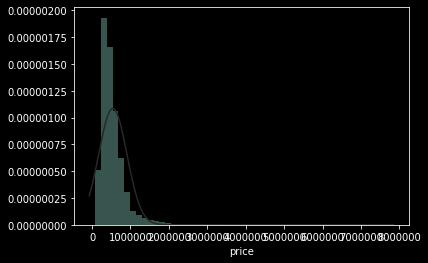

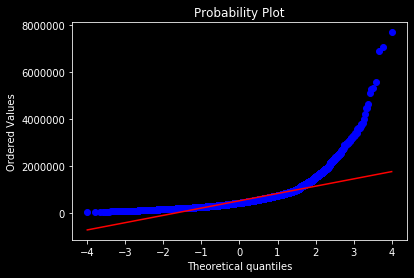

In [117]:
sns.distplot(target, fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(target, plot=plt)

In [118]:
target.skew()

4.023364652271239

In [119]:
target2 = np.log(target)

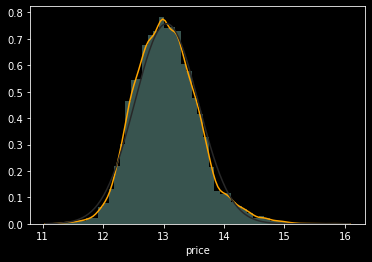

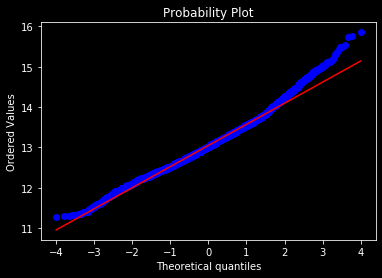

In [120]:
sns.distplot(target2, fit=norm, bins=50, kde_kws={'color':'orange'});
fig = plt.figure()
res = stats.probplot(target2, plot=plt)

In [121]:
target2.skew()

0.4310041773299232

## We can see the distribution of the target data has benefitted dramatically from log transformation

In [122]:
included = stepwise_selection(df, target2)
selected = df[included]
selected.head()

Add  sqft_living15                  with p-value 0.0
Add  bathrooms                      with p-value 0.0
Add  grade                          with p-value 0.0
Add  yr_built                       with p-value 0.0
Add  lat                            with p-value 0.0
Add  sqft_living                    with p-value 3.29972e-250
Add  view                           with p-value 1.15907e-212
Add  condition                      with p-value 8.52738e-84
Add  waterfront                     with p-value 3.34106e-66
Add  floors                         with p-value 2.166e-59
Add  date                           with p-value 1.28061e-37
Add  zipcode                        with p-value 1.06572e-37
Add  long                           with p-value 1.33637e-18
Add  yr_renovated                   with p-value 4.84661e-17
Add  sqft_lot                       with p-value 2.56317e-16
Add  bedrooms                       with p-value 2.36022e-07
Add  sqft_lot15                     with p-value 0.00310574
Add 

,sqft_living15,bathrooms,grade,yr_built,lat,sqft_living,view,condition,waterfront,floors,date,zipcode,long,yr_renovated,sqft_lot,bedrooms,sqft_lot15,sqft_basement2,sqft_above
0,1340,1.00,7,1955,47.5112,1180,0.0,3,0.0,1.0,735519,98178,-122.257,0.0,5650,3,5650,0.0,1180
1,1690,2.25,7,1951,47.7210,2570,0.0,3,0.0,2.0,735576,98125,-122.319,1991.0,7242,3,7639,400.0,2170
2,2720,1.00,6,1933,47.7379,770,0.0,3,0.0,1.0,735654,98028,-122.233,0.0,10000,2,8062,0.0,770
3,1360,3.00,7,1965,47.5208,1960,0.0,5,0.0,1.0,735576,98136,-122.393,0.0,5000,4,5000,910.0,1050
4,1800,2.00,8,1987,47.6168,1680,0.0,3,0.0,1.0,735647,98074,-122.045,0.0,8080,3,7503,0.0,1680


In [123]:
outcome = 'price'
pred_sum = '+'.join(selected.columns)
formula = outcome + '~' + pred_sum

model = ols(formula=formula, data=pd.concat([selected, target2], axis=1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     4061.
Date:                Fri, 25 Oct 2019   Prob (F-statistic):               0.00
Time:                        19:54:56   Log-Likelihood:                -823.97
No. Observations:               21597   AIC:                             1686.
Df Residuals:                   21578   BIC:                             1838.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -150.7891     11.776    -12.805      0.000    -173.871    -127.708
sqft_living15   9.817e-05   4.31e-06     22.772      0.000    8.97e-05       0.000
bathrooms          0.0702      0.004     17.227      0.000       0.062       0.078
grade              0.1604      0.003     59.422      0.000       0.155       0.166
yr_built          -0.0034   8.99e-05    -38.348      0.000      -0.004      -0.003
lat                1.4019      0.013    104.459      0.000       1.376       1.428
sqft_living     9.555e-05   2.85e-06     33.575      0.000       9e-05       0.000
view               0.0617      0.003     23.264      0.000       0.056       0.067
condition          0.0648      0.003     22.075      0.000       0.059       0.071
waterfront         0.3763      0.023     16.607      0.000       0.332       0.421
floors             0.0764      0.004     16.980      0.000       0.068       0.085
date               0.0002   1.52e-05     13.071      0.000       0.000       0.000
zipcode           -0.0006   4.12e-05    -15.730      0.000      -0.001      -0.001
long              -0.1582      0.016     -9.622      0.000      -0.190      -0.126
yr_renovated    4.126e-05   4.97e-06      8.300      0.000    3.15e-05     5.1e-05
sqft_lot         4.64e-07   5.99e-08      7.748      0.000    3.47e-07    5.81e-07
bedrooms          -0.0127      0.002     -5.331      0.000      -0.017      -0.008
sqft_lot15     -2.667e-07   9.17e-08     -2.910      0.004   -4.46e-07   -8.71e-08
sqft_basement2   5.55e-05   3.31e-06     16.772      0.000     4.9e-05     6.2e-05
sqft_above      4.006e-05   2.82e-06     14.220      0.000    3.45e-05    4.56e-05
==============================================================================
Omnibus:                      377.846   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              768.508
Skew:                          -0.037   Prob(JB):                    1.32e-167
Kurtosis:                       3.921   Cond. No.                     2.59e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.78e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### That improved the model accuracy dramatically.

## I am going to make a loop which tries to optimize the transformation options for independent variables.

In [112]:
first_score = .772
best_score = first_score
selected2 = selected.copy()
for var in list(selected2.columns):
    #Check to make sure log transforms not applied to variables with zeroes
    if selected2[var].min() > 0:
        df2 = selected2.copy()
        df2[var] = np.log(selected2[var])
        outcome = 'price'
        pred_sum = '+'.join(df2.columns)
        formula = outcome + '~' + pred_sum
        model = ols(formula=formula, data=pd.concat([df2, target2], axis=1)).fit()
        new_score_log = model.rsquared
    else:
        new_score_log = 0
    
    if selected2[var].min() >= 0:
        df3 = selected2.copy()
        df3[var] = np.sqrt(selected2[var])
        outcome = 'price'
        pred_sum = '+'.join(df3.columns)
        formula = outcome + '~' + pred_sum
        model = ols(formula=formula, data=pd.concat([df3, target2], axis=1)).fit()
        new_score_sqrt = model.rsquared
    
    print(f'Score for log transform: {new_score_log}')
    print(f'Score for sqrt transform: {new_score_sqrt}')
    
    if new_score_sqrt >= new_score_log:
        new_score = new_score_sqrt
        transform = 'sqrt'
    else:
        new_score = new_score_log
        transform = 'log'
        
    if new_score > best_score:
        best_score = new_score
        if transform == 'sqrt':
            selected2[var] = df3[var]
            print(f'Applied {transform} transformation to {var}')
        elif transform == 'log':
            selected2[var] = df2[var]
            print(f'Applied {transform} transformation to {var}')
        else:
            print('something went wrong')
            

outcome = 'price'
pred_sum = '+'.join(selected2.columns)
formula = outcome + '~' + pred_sum
model = ols(formula=formula, data=pd.concat([selected2, target2], axis=1)).fit()
model.summary()
    

Score for log transform: 0.7739711128399525
Score for sqrt transform: 0.7732280427682063
Applied log transformation to sqft_living15
Score for log transform: 0.7742196463162376
Score for sqrt transform: 0.7742486379065701
Applied sqrt transformation to bathrooms
Score for log transform: 0.7740731065810009
Score for sqrt transform: 0.7745653668675343
Applied sqrt transformation to grade
Score for log transform: 0.7747639892322632
Score for sqrt transform: 0.7746652686603381
Applied log transformation to yr_built
Score for log transform: 0.7749117772658973
Score for sqrt transform: 0.7748379809871699
Applied log transformation to lat
Score for log transform: 0.7753846227011078
Score for sqrt transform: 0.7754848202468939
Applied sqrt transformation to sqft_living
Score for log transform: 0
Score for sqrt transform: 0.775670856085835
Applied sqrt transformation to view
Score for log transform: 0.7756569649423772
Score for sqrt transform: 0.7756875115817357
Applied sqrt transformation to c

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     3979.
Date:                Fri, 25 Oct 2019   Prob (F-statistic):               0.00
Time:                        19:32:48   Log-Likelihood:                -541.71
No. Observations:               21597   AIC:                             1123.
Df Residuals:                   21577   BIC:                             1283.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -278.7841     12.060    -23.116      0.000    -302.423    -255.145
sqft_living15      0.2082      0.009     24.001      0.000       0.191       0.225
bathrooms          0.1550      0.012     13.209      0.000       0.132       0.178
grade              0.8745      0.015     59.391      0.000       0.846       0.903
yr_built          -7.2325      0.175    -41.235      0.000      -7.576      -6.889
lat               65.3133      0.634    103.026      0.000      64.071      66.556
sqft_living        0.0065      0.001      5.452      0.000       0.004       0.009
view               0.1083      0.004     25.611      0.000       0.100       0.117
condition          0.2401      0.011     21.663      0.000       0.218       0.262
waterfront         0.4396      0.022     20.109      0.000       0.397       0.482
floors             0.1157      0.012      9.332      0.000       0.091       0.140
date               0.0002    1.5e-05     12.950      0.000       0.000       0.000
zipcode           -0.0007   4.09e-05    -16.553      0.000      -0.001      -0.001
long              -0.1070      0.017     -6.480      0.000      -0.139      -0.075
yr_renovated    3.857e-05   4.91e-06      7.850      0.000    2.89e-05    4.82e-05
sqft_lot          -0.0410      0.003    -12.902      0.000      -0.047      -0.035
bedrooms          -0.0769      0.008     -9.441      0.000      -0.093      -0.061
sqft_lot15      8.748e-07   8.31e-08     10.524      0.000    7.12e-07    1.04e-06
sqft_basement2     0.0035      0.000      8.764      0.000       0.003       0.004
sqft_above         0.0001    1.2e-05     10.146      0.000    9.79e-05       0.000
==============================================================================
Omnibus:                      395.937   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              809.768
Skew:                           0.055   Prob(JB):                    1.45e-176
Kurtosis:                       3.942   Cond. No.                     5.30e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.3e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [113]:
from sklearn.metrics import mean_squared_error

In [115]:
X_train, X_test, y_train, y_test = train_test_split(selected2, target2, random_state=3)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
print('R_squared',linreg.score(X_test,y_test))
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train MSE:',train_mse)
print('Test MSE:',test_mse)

R_squared 0.7758784434691582
Train MSE: 0.06145492606808999
Test MSE: 0.061986698714730525


# Standardization:

In [77]:
target3 = standardize(target2)

In [78]:
included = stepwise_selection(df_final, target3)
selected = df_final[included]
selected.head()

Add  sqft_above                     with p-value 0.0
Add  lat                            with p-value 0.0
Add  view                           with p-value 0.0
Add  grade                          with p-value 0.0
Add  condition                      with p-value 0.0
Add  yr_built                       with p-value 0.0
Add  sqft_basement2                 with p-value 0.0
Add  sqft_living15                  with p-value 6.1775e-75
Add  floors                         with p-value 1.94359e-82
Add  waterfront_1                   with p-value 1.65691e-70
Add  bathrooms                      with p-value 1.59465e-45
Add  zipcode                        with p-value 8.00552e-38
Add  date                           with p-value 1.28756e-37
Add  bedrooms                       with p-value 1.85787e-23
Add  long                           with p-value 1.57351e-17
Add  sqft_lot                       with p-value 3.36894e-15
Add  renovation_5                   with p-value 9.08915e-14
Add  renovation_4   

,sqft_above,lat,view,grade,condition,yr_built,sqft_basement2,sqft_living15,floors,waterfront_1,bathrooms,zipcode,date,bedrooms,long,sqft_lot,renovation_5,renovation_4,renovation_3,sqft_lot15
0,-0.761271,-0.352894,-0.304949,-0.560800,-0.629986,-0.544678,-0.755487,-1.000060,-0.915552,0,-1.451073,1.869645,-0.143122,-0.351583,-0.305695,-0.228182,0,0,0,-0.260627
1,0.579546,1.161376,-0.304949,-0.560800,-0.629986,-0.680850,0.712081,-0.387673,0.937431,0,0.174486,0.879210,0.361047,-0.351583,-0.746286,-0.189739,0,0,0,-0.187700
2,-1.484973,1.283355,-0.304949,-1.413190,-0.629986,-1.293626,-0.755487,1.114061,-0.915552,0,-1.451073,-0.933473,1.050962,-1.627249,-0.135144,-0.123139,0,0,0,-0.172190
3,-0.974737,-0.283604,-0.304949,-0.560800,2.444427,-0.204247,1.458061,-0.963051,-0.915552,0,1.149821,1.084772,0.361047,0.723854,-1.272151,-0.243878,0,0,0,-0.284459
4,-0.033796,0.409293,-0.304949,0.291589,-0.629986,0.544700,-0.755487,-0.208619,-0.915552,0,-0.150626,-0.073850,0.989047,-0.351583,1.200840,-0.169503,0,0,0,-0.192686


In [79]:
outcome = 'price'
pred_sum = '+'.join(selected.columns)
formula = outcome + '~' + pred_sum

model = ols(formula=formula, data=pd.concat([selected, target3], axis=1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     3760.
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        14:32:39   Log-Likelihood:                -14439.
No. Observations:               21597   AIC:                         2.892e+04
Df Residuals:                   21576   BIC:                         2.909e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.0104      0.003     -3.181      0.001      -0.017      -0.004
sqft_above         0.2672      0.008     34.718      0.000       0.252       0.282
lat                0.3682      0.003    105.277      0.000       0.361       0.375
view               0.0903      0.004     23.823      0.000       0.083       0.098
grade              0.3444      0.006     58.095      0.000       0.333       0.356
condition          0.0809      0.004     22.580      0.000       0.074       0.088
yr_built          -0.1922      0.005    -39.609      0.000      -0.202      -0.183
sqft_basement2     0.1491      0.005     31.978      0.000       0.140       0.158
sqft_living15      0.1254      0.006     22.798      0.000       0.115       0.136
floors             0.0740      0.005     16.157      0.000       0.065       0.083
waterfront_1       0.7508      0.043     17.653      0.000       0.667       0.834
bathrooms          0.0840      0.006     14.149      0.000       0.072       0.096
zipcode           -0.0651      0.004    -15.693      0.000      -0.073      -0.057
date               0.0423      0.003     13.121      0.000       0.036       0.049
bedrooms          -0.0413      0.004     -9.670      0.000      -0.050      -0.033
long              -0.0424      0.004     -9.725      0.000      -0.051      -0.034
sqft_lot           0.0365      0.005      7.839      0.000       0.027       0.046
renovation_5       0.3068      0.039      7.821      0.000       0.230       0.384
renovation_4       0.2662      0.041      6.491      0.000       0.186       0.347
renovation_3       0.2196      0.040      5.523      0.000       0.142       0.297
sqft_lot15        -0.0138      0.005     -2.934      0.003      -0.023      -0.005
==============================================================================
Omnibus:                      327.650   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              637.665
Skew:                           0.001   Prob(JB):                    3.41e-139
Kurtosis:                       3.842   Cond. No.                         28.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### This did not improve model performance...
 - it does however seem to magnify the coefficients, which might make them easier to compare and interpret, and also standardizes our MSE

In [80]:
X_train, X_test, y_train, y_test = train_test_split(df_final, target3, random_state=3)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
print('R_squared',linreg.score(X_test,y_test))
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train MSE:',train_mse)
print('Test MSE:',test_mse)

R_squared 0.7755571864430735
Train MSE: 0.22263172285986305
Test MSE: 0.2238996900288557


## Now I will try Recursive Feature Elimination:

In [84]:
from sklearn.feature_selection import RFE

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 21)
selector = selector.fit(df_final, target3)
selector.support_

array([False,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True, False,  True])

In [85]:
scikit_selection = df_final.loc[:,selector.support_]
scikit_selection.head()

,date,bedrooms,bathrooms,sqft_lot,floors,view,condition,grade,sqft_above,yr_built,...,lat,long,sqft_living15,sqft_basement2,renovation_1,renovation_2,renovation_3,renovation_4,renovation_5,waterfront_1
0,-0.143122,-0.351583,-1.451073,-0.228182,-0.915552,-0.304949,-0.629986,-0.560800,-0.761271,-0.544678,...,-0.352894,-0.305695,-1.000060,-0.755487,0,0,0,0,0,0
1,0.361047,-0.351583,0.174486,-0.189739,0.937431,-0.304949,-0.629986,-0.560800,0.579546,-0.680850,...,1.161376,-0.746286,-0.387673,0.712081,0,1,0,0,0,0
2,1.050962,-1.627249,-1.451073,-0.123139,-0.915552,-0.304949,-0.629986,-1.413190,-1.484973,-1.293626,...,1.283355,-0.135144,1.114061,-0.755487,0,0,0,0,0,0
3,0.361047,0.723854,1.149821,-0.243878,-0.915552,-0.304949,2.444427,-0.560800,-0.974737,-0.204247,...,-0.283604,-1.272151,-0.963051,1.458061,0,0,0,0,0,0
4,0.989047,-0.351583,-0.150626,-0.169503,-0.915552,-0.304949,-0.629986,0.291589,-0.033796,0.544700,...,0.409293,1.200840,-0.208619,-0.755487,0,0,0,0,0,0


In [86]:
pred_sum = '+'.join(scikit_selection.columns)
formula = outcome + '~' + pred_sum

model = ols(formula=formula, data=pd.concat([scikit_selection, target3], axis=1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     3580.
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        14:34:10   Log-Likelihood:                -14439.
No. Observations:               21597   AIC:                         2.892e+04
Df Residuals:                   21575   BIC:                         2.910e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.0102      0.003     -3.103      0.002      -0.017      -0.004
date               0.0423      0.003     13.106      0.000       0.036       0.049
bedrooms          -0.0408      0.004     -9.549      0.000      -0.049      -0.032
bathrooms          0.0843      0.006     14.185      0.000       0.073       0.096
sqft_lot           0.0272      0.003      8.046      0.000       0.021       0.034
floors             0.0746      0.005     16.288      0.000       0.066       0.084
view               0.0901      0.004     23.749      0.000       0.083       0.098
condition          0.0808      0.004     22.510      0.000       0.074       0.088
grade              0.3443      0.006     58.086      0.000       0.333       0.356
sqft_above         0.2662      0.008     34.617      0.000       0.251       0.281
yr_built          -0.1926      0.005    -38.989      0.000      -0.202      -0.183
zipcode           -0.0653      0.004    -15.732      0.000      -0.073      -0.057
lat                0.3685      0.003    105.351      0.000       0.362       0.375
long              -0.0435      0.004    -10.023      0.000      -0.052      -0.035
sqft_living15      0.1249      0.005     22.725      0.000       0.114       0.136
sqft_basement2     0.1488      0.005     31.908      0.000       0.140       0.158
renovation_1      -0.0824      0.038     -2.190      0.029      -0.156      -0.009
renovation_2       0.0697      0.040      1.761      0.078      -0.008       0.147
renovation_3       0.2185      0.040      5.492      0.000       0.141       0.297
renovation_4       0.2655      0.041      6.471      0.000       0.185       0.346
renovation_5       0.3065      0.039      7.808      0.000       0.230       0.383
waterfront_1       0.7479      0.043     17.553      0.000       0.664       0.831
==============================================================================
Omnibus:                      329.210   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              641.846
Skew:                          -0.001   Prob(JB):                    4.22e-140
Kurtosis:                       3.845   Cond. No.                         28.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Now I will try eliminating based on adjusted R squared:

In [87]:
import statsmodels.formula.api as smf

def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {}".format(response,
                                           ' + '.join(selected + [candidate]))
            score = ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score <= best_new_score:
            if current_score == best_new_score:
                print('scores equal')
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
        elif current_score > best_new_score:
            print('score higher, breaking')
            print('unused columns:',remaining)
            break
            
        #last_best = best_candidate
        #print(len(remaining))
    formula = "{} ~ {} ".format(response,
                                   ' + '.join(selected))
    model = ols(formula, data).fit()
    return selected, model

In [88]:
selected, model3 = forward_selected(pd.concat([df_final, target3], axis=1), 'price')
model3.summary()

score higher, breaking
unused columns: {'waterfront_0'}


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     3134.
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        14:37:27   Log-Likelihood:                -14434.
No. Observations:               21597   AIC:                         2.892e+04
Df Residuals:                   21572   BIC:                         2.912e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.0102      0.003     -3.115      0.002      -0.017      -0.004
grade              0.3438      0.006     57.977      0.000       0.332       0.355
lat                0.3683      0.003    105.271      0.000       0.361       0.375
sqft_living       -0.0014      0.031     -0.045      0.964      -0.062       0.059
yr_built          -0.1924      0.005    -38.911      0.000      -0.202      -0.183
view               0.0900      0.004     23.732      0.000       0.083       0.097
condition          0.0811      0.004     22.508      0.000       0.074       0.088
sqft_living15      0.1257      0.006     22.756      0.000       0.115       0.137
floors             0.0740      0.005     16.056      0.000       0.065       0.083
waterfront_1       0.7499      0.043     17.596      0.000       0.666       0.833
bathrooms          0.0839      0.006     14.113      0.000       0.072       0.096
date               0.0423      0.003     13.099      0.000       0.036       0.049
zipcode           -0.0652      0.004    -15.709      0.000      -0.073      -0.057
bedrooms          -0.0414      0.004     -9.557      0.000      -0.050      -0.033
long              -0.0427      0.004     -9.773      0.000      -0.051      -0.034
sqft_lot           0.0369      0.005      7.914      0.000       0.028       0.046
renovation_5       0.3070      0.039      7.816      0.000       0.230       0.384
renovation_4       0.2666      0.041      6.497      0.000       0.186       0.347
renovation_3       0.2198      0.040      5.524      0.000       0.142       0.298
sqft_basement2     0.1498      0.015      9.774      0.000       0.120       0.180
sqft_above         0.2687      0.030      9.074      0.000       0.211       0.327
sqft_lot15        -0.0135      0.005     -2.870      0.004      -0.023      -0.004
renovation_1      -0.0825      0.038     -2.191      0.028      -0.156      -0.009
renovation_2       0.0708      0.040      1.788      0.074      -0.007       0.148
id                 0.0034      0.003      1.058      0.290      -0.003       0.010
==============================================================================
Omnibus:                      330.144   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              644.345
Skew:                           0.002   Prob(JB):                    1.21e-140
Kurtosis:                       3.846   Cond. No.                         32.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
selected = df_final[selected]

In [90]:
X_train, X_test, y_train, y_test = train_test_split(df_final, target3, random_state=3)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
print('R_squared',linreg.score(X_test,y_test))
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train MSE:',train_mse)
print('Test MSE:',test_mse)

R_squared 0.7755571864430735
Train MSE: 0.22263172285986305
Test MSE: 0.2238996900288557


### As seen above, the variable selection methods all returned very similar model scores. However, the final method included some features that are not statistically significant as they have p-values which are over 0.05. The stepwise selection is my preferred method, as it included only statistically significant variables, and I can easily mess with the code. I will repeat this below to continue.

In [91]:
included = stepwise_selection(df_final, target3)
selected = df_final[included]

Add  sqft_above                     with p-value 0.0
Add  lat                            with p-value 0.0
Add  view                           with p-value 0.0
Add  grade                          with p-value 0.0
Add  condition                      with p-value 0.0
Add  yr_built                       with p-value 0.0
Add  sqft_basement2                 with p-value 0.0
Add  sqft_living15                  with p-value 6.1775e-75
Add  floors                         with p-value 1.94359e-82
Add  waterfront_1                   with p-value 1.65691e-70
Add  bathrooms                      with p-value 1.59465e-45
Add  zipcode                        with p-value 8.00552e-38
Add  date                           with p-value 1.28756e-37
Add  bedrooms                       with p-value 1.85787e-23
Add  long                           with p-value 1.57351e-17
Add  sqft_lot                       with p-value 3.36894e-15
Add  renovation_5                   with p-value 9.08915e-14
Add  renovation_4   

In [92]:
outcome = 'price'
pred_sum = '+'.join(selected.columns)
formula = outcome + '~' + pred_sum

model = ols(formula=formula, data=pd.concat([selected, target3], axis=1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     3760.
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        14:38:26   Log-Likelihood:                -14439.
No. Observations:               21597   AIC:                         2.892e+04
Df Residuals:                   21576   BIC:                         2.909e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.0104      0.003     -3.181      0.001      -0.017      -0.004
sqft_above         0.2672      0.008     34.718      0.000       0.252       0.282
lat                0.3682      0.003    105.277      0.000       0.361       0.375
view               0.0903      0.004     23.823      0.000       0.083       0.098
grade              0.3444      0.006     58.095      0.000       0.333       0.356
condition          0.0809      0.004     22.580      0.000       0.074       0.088
yr_built          -0.1922      0.005    -39.609      0.000      -0.202      -0.183
sqft_basement2     0.1491      0.005     31.978      0.000       0.140       0.158
sqft_living15      0.1254      0.006     22.798      0.000       0.115       0.136
floors             0.0740      0.005     16.157      0.000       0.065       0.083
waterfront_1       0.7508      0.043     17.653      0.000       0.667       0.834
bathrooms          0.0840      0.006     14.149      0.000       0.072       0.096
zipcode           -0.0651      0.004    -15.693      0.000      -0.073      -0.057
date               0.0423      0.003     13.121      0.000       0.036       0.049
bedrooms          -0.0413      0.004     -9.670      0.000      -0.050      -0.033
long              -0.0424      0.004     -9.725      0.000      -0.051      -0.034
sqft_lot           0.0365      0.005      7.839      0.000       0.027       0.046
renovation_5       0.3068      0.039      7.821      0.000       0.230       0.384
renovation_4       0.2662      0.041      6.491      0.000       0.186       0.347
renovation_3       0.2196      0.040      5.523      0.000       0.142       0.297
sqft_lot15        -0.0138      0.005     -2.934      0.003      -0.023      -0.005
==============================================================================
Omnibus:                      327.650   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              637.665
Skew:                           0.001   Prob(JB):                    3.41e-139
Kurtosis:                       3.842   Cond. No.                         28.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# A look at Cross Validation, residuals, and model fit:

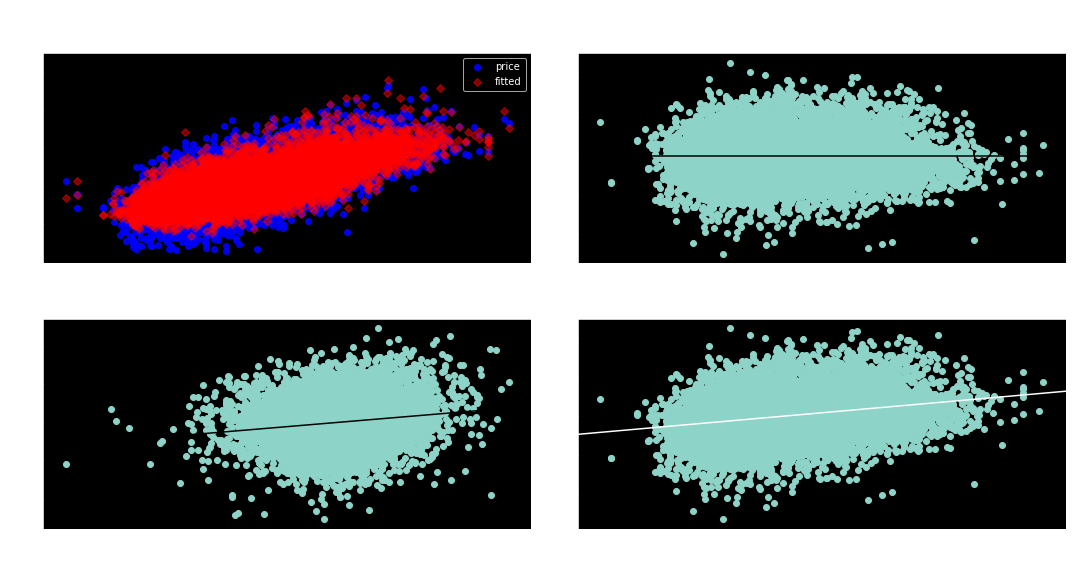

In [93]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'sqft_living15',fig=fig)
plt.show()

C:\Users\indez\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


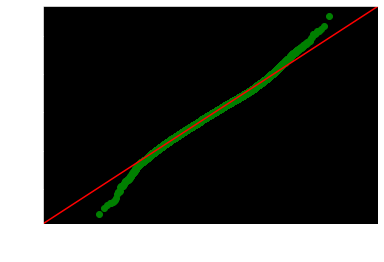

In [94]:
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45',fit=True, color='g')
fig.show()

In [95]:
import statsmodels.stats.api as sms

In [96]:
name=['Jarque-Bera','Prob','Skew','Kurtosis']
test= sms.jarque_bera(model.resid)
list(zip(name,test))

[('Jarque-Bera', 637.6647086450204),
 ('Prob', 3.410891191605113e-139),
 ('Skew', 0.0014063795383743249),
 ('Kurtosis', 3.841787888985215)]

In [97]:
from sklearn.model_selection import cross_val_score

r2_results = cross_val_score(linreg, selected, target3, cv=5, scoring="r2")
mse_results = cross_val_score(linreg, selected, target3, cv=5, scoring="neg_mean_squared_error")

print('Cross Validation R2 results:',r2_results)
print('    Average R2:',r2_results.mean())
print('Cross Validation MSE results:',abs(mse_results))
print('    Average MSE:',abs(mse_results.mean()))

Cross Validation R2 results: [0.78087349 0.77174829 0.77063678 0.78046885 0.76308985]
    Average R2: 0.7733634513511716
Cross Validation MSE results: [0.22769299 0.22730703 0.22047545 0.22859621 0.22451495]
    Average MSE: 0.2257173242928327


In [98]:
model.mse_resid

0.22317531742317034

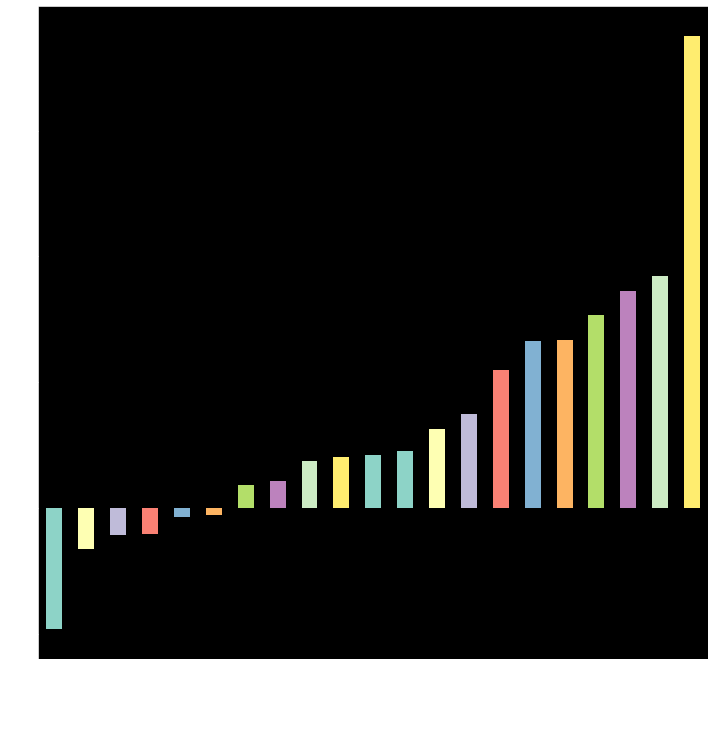

In [99]:
model.params.sort_values().plot(kind='bar', figsize=(12,12))

In [100]:
model.params.sort_values()

yr_built         -0.192210
zipcode          -0.065121
long             -0.042363
bedrooms         -0.041325
sqft_lot15       -0.013772
Intercept        -0.010379
sqft_lot          0.036489
date              0.042333
floors            0.073975
condition         0.080900
bathrooms         0.083990
view              0.090279
sqft_living15     0.125393
sqft_basement2    0.149138
renovation_3      0.219554
renovation_4      0.266180
sqft_above        0.267204
renovation_5      0.306845
grade             0.344355
lat               0.368217
waterfront_1      0.750757
dtype: float64

# Conclusions:
 - the features have been standardized, so the coeficients can be analyzed knowing that they should be on relatively the same scale (apart from the categorical variables).
 - the most directly influential feature was 'waterfront_1', which was the dummy variable which represented that the house was for sure located on the water. This makes sense, as waterfront property is more valuable than comparable properties which are landlocked.
 - the grade of the house was the next biggest predictor of price.
 - latitude had a surprisingly large impact, this indicates that the more valuable houses tend to be on one side of town.
 - the renovation variables turned out to make an interesting discovery, in that more recent renovations made the houses more valuable, but the most important factor was whether the house has been renovated since 1995.
 - the yr_built feature actually had a negative correlation to price in the model, but this is likely due to the standardization of the yr_built variable. As can be seen from the initial heatmap of the data, there was no correlation between yr_built and price before the standardization. Also, if you we look at the histogram of yr_built after the standardization, there is a skew to the data leading to larger negative values than positive values. It should be noted that the newest houses built after 2000 were generally not renovated, seen below.
 - the house square footage and basement square footage were decently strong predictors.
 - the 'date' feature made it into the model after all. Even though the dates were over only one year, housing markets do fluctuate in this time and anyone should take that into consideration when buying or selling a house.
 - the 'id' and 'sqft_living' columns did not make it into the model, despite being left in the dataset until the feature selection process.
 

# Investigating the negative correlation between yr_built and price:

### We can do this by looking at how the most impactful variables on price are correlated with 'yr_built'

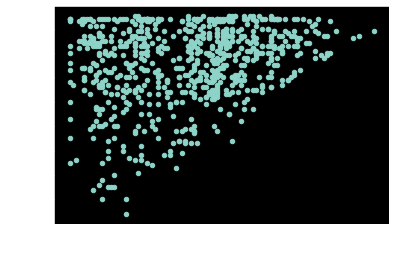

In [110]:
dfcheck = pd.read_csv('kc_house_data.csv')
dfcheck = dfcheck[dfcheck['yr_renovated']>0]
dfcheck.plot(kind='scatter',x='yr_built',y='yr_renovated')

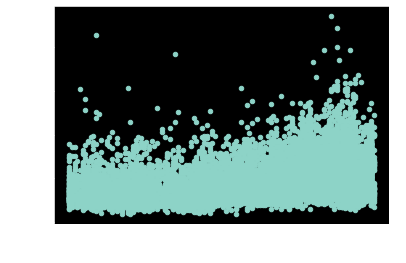

In [111]:
dfcheck = pd.read_csv('kc_house_data.csv')
dfcheck.plot(kind='scatter',x='yr_built',y='sqft_above')

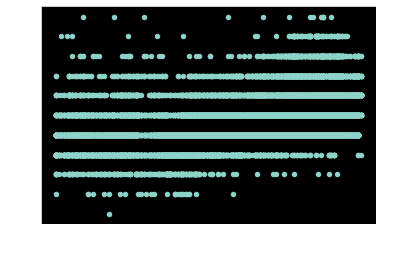

In [112]:
dfcheck.plot(kind='scatter',x='yr_built',y='grade')

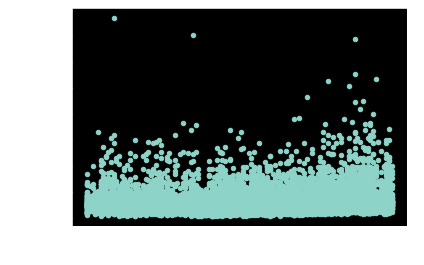

In [113]:
dfcheck.plot(kind='scatter',x='yr_built',y='price')

In [115]:
dfcheck.yr_built.corr(dfcheck.price)

0.053953333465191156

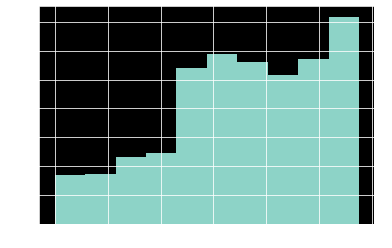

In [114]:
dfcheck.yr_built.hist()

## After investigating these relationships, I would say the most likely cause for the negative correlation between yr_built and price is caused by something which can be seen in the first graph above charting 'yr_renovated' over 'yr_built'. There are essentialy no renovations on homes built after 2000, though there are many such houses in the dataset, and most recent renovations tend to occur on houses that were built prior to 1985. We learned from the model that recent renovations were a huge advantage for sales price, and we have determined that houses built longer ago are more likely to have been renovated recently.
 - it can also be noted that the grade and sqft_above also have decreasing upper limits in houses built after 2000, further contributing to more recent houses having lower sales values. Coupling this with the large number of houses built after 2000 in the dataset, this can further explain how the model developed a strong negative coefficient for the 'yr_built' variable.

# For good measure I am going to save another copy of the dataframe with all of the cleaning and standardization:

In [119]:
dfforlater = pd.concat([df_final, target3],axis=1)
dfforlater.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,...,sqft_lot15,sqft_basement2,renovation_1,renovation_2,renovation_3,renovation_4,renovation_5,waterfront_0,waterfront_1,price
0,0.886034,-0.143122,-0.351583,-1.451073,-1.075356,-0.228182,-0.915552,-0.304949,-0.629986,-0.560800,...,-0.260627,-0.755487,0,0,0,0,0,0,0,-1.402030
1,0.637413,0.361047,-0.351583,0.174486,0.639018,-0.189739,0.937431,-0.304949,-0.629986,-0.560800,...,-0.187700,0.712081,0,1,0,0,0,1,0,0.279945
2,0.365362,1.050962,-1.627249,-1.451073,-1.767886,-0.123139,-0.915552,-0.304949,-0.629986,-1.413190,...,-0.172190,-0.755487,0,0,0,0,0,1,0,-1.799472
3,-0.727673,0.361047,0.723854,1.149821,-0.034738,-0.243878,-0.915552,-0.304949,2.444427,-0.560800,...,-0.284459,1.458061,0,0,0,0,0,1,0,0.499710
4,-0.912887,0.989047,-0.351583,-0.150626,-0.379216,-0.169503,-0.915552,-0.304949,-0.629986,0.291589,...,-0.192686,-0.755487,0,0,0,0,0,1,0,0.178438


In [120]:
dfforlater.to_csv(r'df_clean.csv')